In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_fscore_support

In [2]:
datatrain = pd.read_csv('train.csv',delimiter='|')
datatest = pd.read_csv('test.csv',delimiter ='|')

## Praproses Data

In [3]:
datatest.isnull().sum()

trustLevel                   0
totalScanTimeInSeconds       0
grandTotal                   0
lineItemVoids                0
scansWithoutRegistration     0
quantityModifications        0
scannedLineItemsPerSecond    0
valuePerSecond               0
lineItemVoidsPerPosition     0
dtype: int64

In [4]:
datatrain.isnull().sum()

trustLevel                   0
totalScanTimeInSeconds       0
grandTotal                   0
lineItemVoids                0
scansWithoutRegistration     0
quantityModifications        0
scannedLineItemsPerSecond    0
valuePerSecond               0
lineItemVoidsPerPosition     0
fraud                        0
dtype: int64

In [7]:
totalItem = datatrain['scannedLineItemsPerSecond'] * datatrain['totalScanTimeInSeconds'] 
totalItem = pd.DataFrame(totalItem)
datatrain['totalItem']=totalItem
datatrain.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud,totalItem
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,0,29.0
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,0,14.0
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769,0,13.0
3,6,1791,92.31,8,4,4,0.016192,0.051541,0.275862,0,29.0
4,5,430,81.53,3,7,2,0.062791,0.189605,0.111111,0,27.0


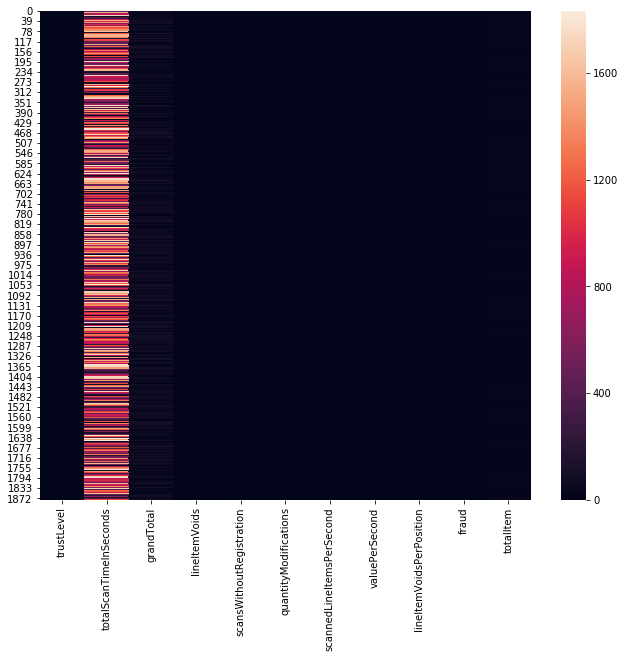

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(datatrain)
plt.show()

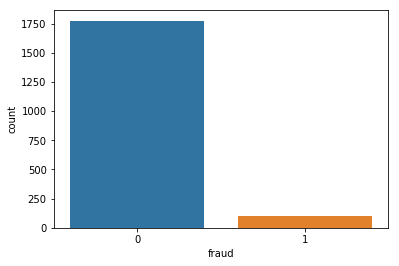

In [50]:
ax = sns.countplot(x="fraud", data=datatrain)

In [8]:
totalItem = datatest['scannedLineItemsPerSecond'] * datatest['totalScanTimeInSeconds'] 
totalItem = pd.DataFrame(totalItem)
datatest['totalItem']=totalItem
datatest.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,totalItem
0,4,467,88.48,4,8,4,0.014989,0.189465,0.571429,7.0
1,3,1004,58.99,7,6,1,0.026892,0.058755,0.259259,27.0
2,1,162,14.00,4,5,4,0.006173,0.086420,4.000000,1.0
3,5,532,84.79,9,3,4,0.026316,0.159380,0.642857,14.0
4,5,890,42.16,4,0,0,0.021348,0.047371,0.210526,19.0


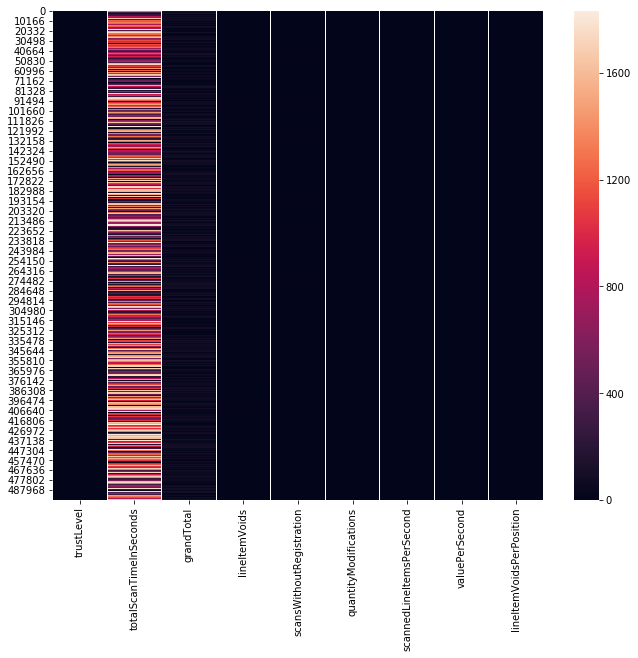

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(datatest)
plt.show()

In [9]:
y_test = pd.read_csv('DMC-2019-realclass.csv')

In [10]:
X_train = datatrain.iloc[:,[0,1,2,3,4,5,6,7,8,10]]
X_test = datatest.iloc[:,[0,1,2,3,4,5,6,7,8,9]]
y_train = datatrain.iloc[:,[9]]

## SVM

In [11]:
from sklearn import svm
clf = svm.SVC(kernel='linear')

In [12]:
clf.fit(X_train,y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [13]:
y_pred = clf.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9906368131437944

In [15]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print(tn,fp,fn,tp)

472111 2283 2381 21346


In [16]:
total = (fp*-25)+(fn*-5)+(tp*5)
print(total)

37750


## Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0)

In [18]:
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [19]:
y_pred = model.predict(X_test)

In [20]:
accuracy_score(y_test,y_pred)

0.9813579431503591

In [21]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print(tn,fp,fn,tp)

469824 4570 4716 19011


In [22]:
total = (fp*-25)+(fn*-5)+(tp*5)
print(total)

-42775


# Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)

In [24]:
lr.fit(X_train,y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
y_pred = lr.predict(X_test)

In [26]:
accuracy_score(y_test,y_pred)

0.9725287630916986

In [27]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print(tn,fp,fn,tp)

467181 7213 6471 17256


In [28]:
total = (fp*-25)+(fn*-5)+(tp*5)
print(total)

-126400


## Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [30]:
nb.fit(X_train,y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [31]:
y_pred = nb.predict(X_test)

In [32]:
accuracy_score(y_test,y_pred)

0.9148620515898748

In [33]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print(tn,fp,fn,tp)

432962 41432 977 22750


In [34]:
total = (fp*-25)+(fn*-5)+(tp*5)
print(total)

-926935


## KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [36]:
knn.fit(X_train,y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [37]:
y_pred = knn.predict(X_test)

In [38]:
accuracy_score(y_test,y_pred)

0.9471273044099727

In [39]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print(tn,fp,fn,tp)

470820 3574 22763 964


In [40]:
total = (fp*-25)+(fn*-5)+(tp*5)
print(total)

-198345


## Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2, random_state=0)

In [42]:
rf.fit(X_train,y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [43]:
y_pred = rf.predict(X_test)

In [44]:
accuracy_score(y_test,y_pred)

0.9523669951678407

In [45]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print(tn,fp,fn,tp)

474394 0 23727 0


In [46]:
total = (fp*-25)+(fn*-5)+(tp*5)
print(total)

-118635
